In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
import warnings
warnings.filterwarnings('ignore')

download data from yfinance

In [2]:
def download_data(ticker, start_date, end_date):
    data = yf.download(ticker, start=start_date, end=end_date)
    data.reset_index(inplace=True)
    data = data[['Date', 'Close']] 
    return data

Prepare data to model

In [3]:
def prepare_data(data):
    data['days_since_start'] = (data['Date'] - data['Date'].min()).dt.days
    X = data[['days_since_start']]
    y = data['Close']
    return train_test_split(X, y, test_size=0.2, random_state=42)

Build and train model

In [4]:
def build_and_train_model(X_train, y_train, model):
    if model == "LinearRegression":
        model = LinearRegression()
    elif model == "XGBoost":
        model = XGBRegressor()
    elif model == "RandomForest":
        model = RandomForestRegressor()
    else:
        print("Wrong model name")
    model = model.fit(X_train, y_train)
    return model

Visuzalize results on plot

In [5]:
def visualize_results(data, model):
    data['predicted_price'] = model.predict(data[['days_since_start']])
    plt.figure(figsize=(10, 6))
    plt.plot(data['Date'], data['Close'], label='Real price', color='blue')
    plt.plot(data['Date'], data['predicted_price'], label='Predicted price', color='red')
    plt.xlabel('Date')
    plt.ylabel('Price EUR')
    plt.title('Predicted EUR price in PLN')
    plt.legend()
    plt.show()

Train model, predict and count MSE and $R^2$, predict price

In [12]:
def predict(model, ticker, start_date, end_date):
    
    data = download_data(ticker, start_date, end_date)

    if data.empty:
        print("Download data failed.")

    X_train, X_test, y_train, y_test = prepare_data(data)

    model = build_and_train_model(X_train, y_train, model)

    predictions = model.predict(X_test)
    mse = mean_squared_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    print(f"Mean squared error (MSE): {mse:.2f}")
    print(f"Coefficient of determination (R^2): {r2:.2f}")

    visualize_results(data, model)

    days_ahead = 5
    future_day = data['days_since_start'].max() + days_ahead
    prediction = model.predict([[future_day]])
    future_price = prediction.item()
    print(f"Predicted price in {days_ahead} days: {future_price:.2f} PLN")

    days_ahead10 = 10
    future_day10 = data['days_since_start'].max() + days_ahead10
    prediction = model.predict([[future_day10]])
    future_price10 = prediction.item()
    print(f"Predicted price in {days_ahead10} days: {future_price10:.2f} PLN")

[*********************100%***********************]  1 of 1 completed

Mean squared error (MSE): 0.00
Coefficient of determination (R^2): 0.44


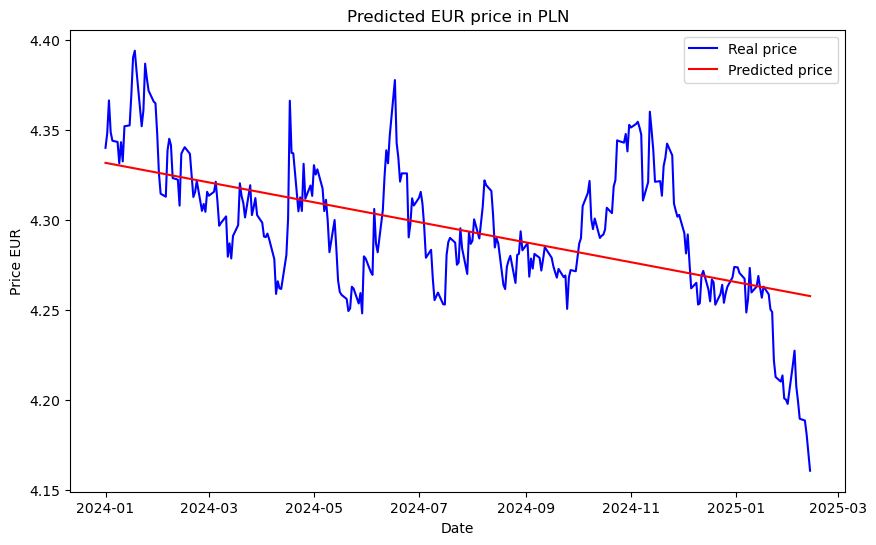

Predicted price in 5 days: 4.26 PLN
Predicted price in 10 days: 4.26 PLN


In [13]:
predict("LinearRegression",ticker="EURPLN=X", start_date="2024-01-01", end_date="2025-02-14")

[*********************100%***********************]  1 of 1 completed


Mean squared error (MSE): 0.00
Coefficient of determination (R^2): 0.87


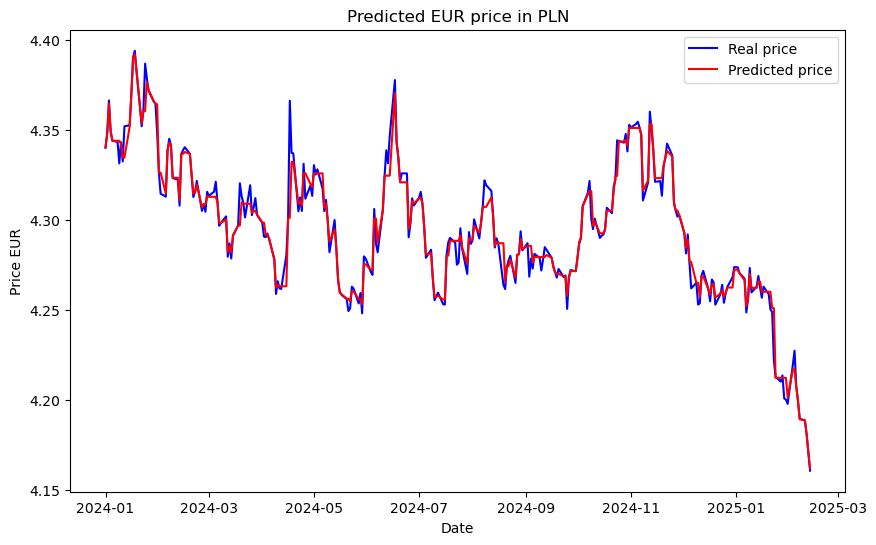

Predicted price in 5 days: 4.16 PLN
Predicted price in 10 days: 4.16 PLN


In [14]:
predict("XGBoost",ticker="EURPLN=X", start_date="2024-01-01", end_date="2025-02-14")

[*********************100%***********************]  1 of 1 completed


Mean squared error (MSE): 0.00
Coefficient of determination (R^2): 0.88


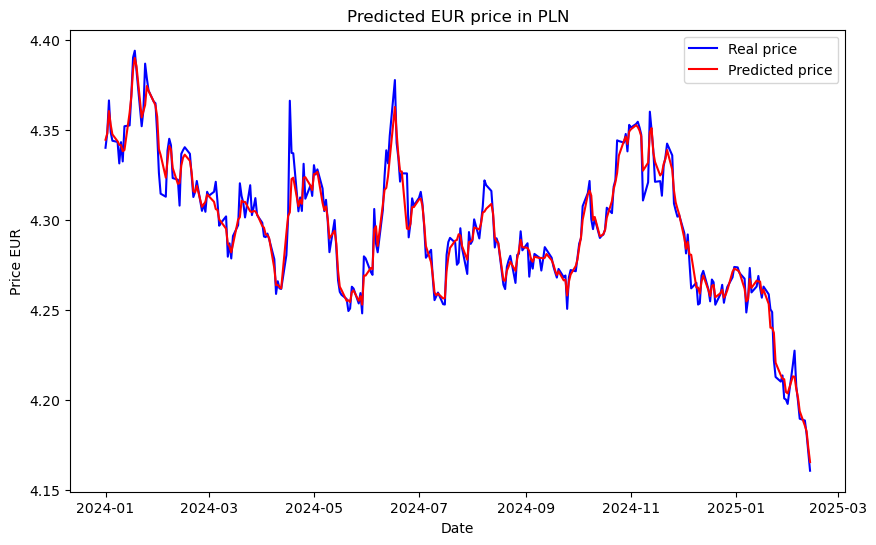

Predicted price in 5 days: 4.17 PLN
Predicted price in 10 days: 4.17 PLN


In [15]:
predict("RandomForest",ticker="EURPLN=X", start_date="2024-01-01", end_date="2025-02-14")